In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xtb

In [2]:
df = pd.read_csv("./Datasets/scorePridiction.csv")

# EDA


In [3]:
# Remove whitespace from column names
df.columns = df.columns.str.strip()

# Strip whitespace from string values in object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

In [4]:
df.shape

(260920, 15)

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,1,0.0,1.0,1.0,1,0,1
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,2,0.1,1.0,2.0,1,1,1
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,3,0.2,2.0,3.0,2,1,2
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,4,0.3,2.0,4.0,2,2,2
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,0,5,0.4,2.0,5.0,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   mid             260920 non-null  int64  
 1   date            260920 non-null  object 
 2   venue           260920 non-null  object 
 3   bat_team        260920 non-null  object 
 4   bowl_team       260920 non-null  object 
 5   batsman         260920 non-null  object 
 6   bowler          260920 non-null  object 
 7   runs            260920 non-null  int64  
 8   wickets         260920 non-null  int64  
 9   overs           260920 non-null  float64
 10  runs_last_5     260920 non-null  float64
 11  wickets_last_5  260920 non-null  float64
 12  striker         260920 non-null  int64  
 13  non_striker     260920 non-null  int64  
 14  total           260920 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 29.9+ MB


# Observations

- There are no null values in the data set.
- Total of 260920 rows of records in the data.
- Average Score is 157.21.


In [8]:
df.describe()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,5.710855e+05,1.332807,120.605442,9.460126,37.124601,120.605442,157.219895,157.219025,157.219895
std,3.679913e+05,1.626416,70.063473,5.686156,13.939299,70.063473,99.633758,99.634140,99.633758
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.123530e+05,0.000000,60.000000,4.400000,29.000000,60.000000,71.000000,71.000000,71.000000
50%,6.449860e+05,1.000000,120.000000,9.300000,37.000000,120.000000,153.000000,153.000000,153.000000
75%,9.180850e+05,1.000000,180.000000,14.300000,46.000000,180.000000,235.000000,235.000000,235.000000
max,1.090331e+06,7.000000,269.000000,19.900000,113.000000,269.000000,549.000000,549.000000,549.000000


In [9]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non_striker', 'total'],
      dtype='object')

In [10]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [11]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

##### Observations

- There Are Some Teams `['Pune Warriors', 'Kochi Tuskers Kerala','Rising Pune Supergiants', 'Gujarat Lions', 'Rising Pune Supergiant']` That Doesn't Play Now. So We Can Remove Them.
- Teams Like `['Deccan Chargers','Delhi Daredevils']` changed their name to `['Sunrisers Hyderabad',
'Delhi Capitals']` So We Can Combine Records of Both By Replacing Deccan Chargers with Sunrisers Hyderabaed.


In [12]:
temp = df.copy()

In [13]:
# Current Playing Teams (Till 2024 IPL Season)
teams = [
    'Chennai Super Kings',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Delhi Capitals',
    'Rajasthan Royals',
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bengaluru',
    'Lucknow Super Giants',
    'Gujarat Titans',
]

In [14]:
# Replace old team names with new ones
temp['bowl_team'] = temp['bowl_team'].replace({
    'Punjab Kings': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

# Same for 'bat_team'
temp['bat_team'] = temp['bat_team'].replace({
    'Punjab Kings': 'Kings XI Punjab',
    'Delhi Daredevils': 'Delhi Capitals',
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Rising Pune Supergiants': 'Rising Pune Supergiant',
    'Royal Challengers Bangalore': 'Royal Challengers Bengaluru'
})

In [15]:
# Filter out teams that no longer play
temp = temp[(temp['bat_team'].isin(teams)) & (temp['bowl_team'].isin(teams))]

In [16]:
temp.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [17]:
temp.bowl_team.unique()

array(['Royal Challengers Bengaluru', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Capitals',
       'Rajasthan Royals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [18]:
df = temp

In [19]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bengaluru',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Capitals', 'Mumbai Indians', 'Sunrisers Hyderabad',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

# Removing First 5 Overs Data in Every Match


In [20]:
temp = df.copy()

In [21]:
df = df[df['overs'] >= 5.0]

In [22]:
temp.shape, df.shape

((233901, 15), (172643, 15))

In [23]:
df.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non_striker', 'total'],
      dtype='object')

In [24]:
df.head(3)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non_striker,total
32,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,BB McCullum,Z Khan,1,33,5.0,59.0,33.0,61,60,61
33,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,SC Ganguly,Z Khan,0,34,5.1,59.0,34.0,61,61,61
34,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bengaluru,RT Ponting,Z Khan,0,35,5.2,59.0,35.0,61,61,61


In [25]:
# Checking Unique Values In Every Columns
for col in df.columns:
    print(f"Column {col} has {df[col].nunique()} unique values")

Column mid has 979 unique values
Column date has 769 unique values
Column venue has 55 unique values
Column bat_team has 10 unique values
Column bowl_team has 10 unique values
Column batsman has 636 unique values
Column bowler has 504 unique values
Column runs has 8 unique values
Column wickets has 235 unique values
Column overs has 148 unique values
Column runs_last_5 has 98 unique values
Column wickets_last_5 has 235 unique values
Column striker has 507 unique values
Column non_striker has 507 unique values
Column total has 507 unique values


# Dropping Unnecessary Columns

1. Batsman : Players Gets Removed and Added In Every Match. Having Data Only For 636 Players Is Not Enough.
2. Bowler: Less Data Contains Only 504 Bowlers.
3. mid: ID of match (Not Required For Prediction)
4. striker : Batsman on strike (Same Reason as Col batsman and bowler)
5. non-striker: Same Reason as Col batsman and bowler.
   <br><br>
   ➡️ Date : It is also not required but we will use it to split the data based on season.


In [26]:
# columns = ['mid', 'batsman', 'bowler', 'striker', 'non_striker', 'venue']
columns = ['batsman', 'bowler', 'striker', 'non_striker', 'venue']
df.drop(columns, inplace=True, axis=1)

In [27]:
df.head()

,mid,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,1,33,5.0,59.0,33.0,61
33,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,34,5.1,59.0,34.0,61
34,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,35,5.2,59.0,35.0,61
35,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,36,5.3,59.0,36.0,61
36,1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,0,37,5.4,58.0,37.0,61


##### Date


In [28]:
df.date.dtype

dtype('O')

In [29]:
df.date.head()

32    2008-04-18
33    2008-04-18
34    2008-04-18
35    2008-04-18
36    2008-04-18
Name: date, dtype: object

In [30]:
df['season'] = df['date'].apply(lambda x: x.split('-')[0]).astype(int)

In [31]:
df['season']

32        2008
33        2008
34        2008
35        2008
36        2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 172643, dtype: int64

C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\826992997.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_per_season = df.groupby('season').apply(


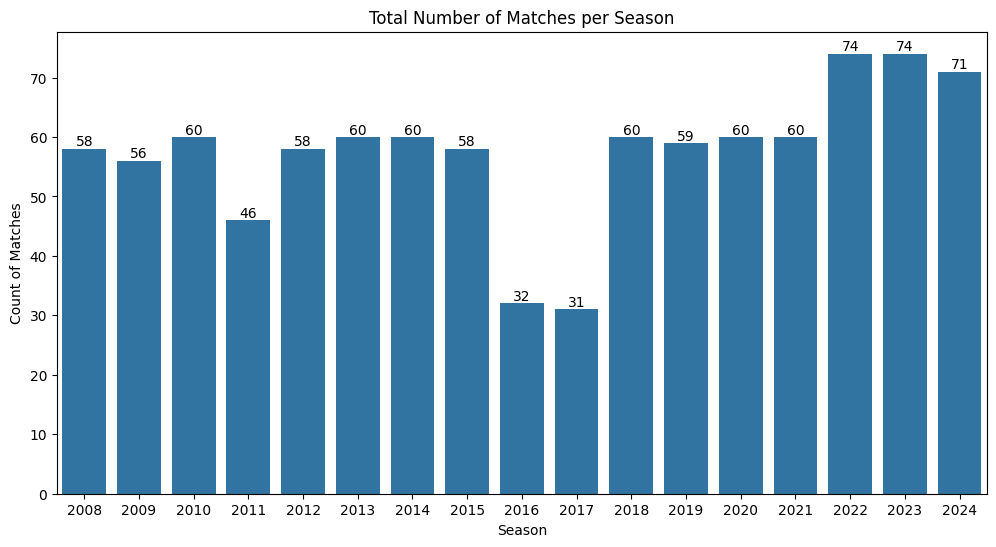

In [32]:
matches_per_season = df.groupby('season').apply(
    lambda x:  round(x[['date', 'bat_team', 'bowl_team']
                       ].drop_duplicates().shape[0]/2)
).reset_index(name='match_count')


matches_per_season = matches_per_season[['season', 'match_count']]


plt.figure(figsize=(12, 6))
ax = sns.barplot(x='season', y='match_count', data=matches_per_season)
ax.bar_label(ax.containers[0])
plt.title('Total Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Count of Matches')
plt.show()

In [33]:
df.drop('date', inplace=True, axis=1)

In [34]:
# Average Score By Each Team
pd.DataFrame(df.groupby(['bat_team'])['total'].mean())

,total
bat_team,
Chennai Super Kings,169.837540
Delhi Capitals,186.028707
Gujarat Titans,192.998777
Kings XI Punjab,179.408818
Kolkata Knight Riders,177.824870
Lucknow Super Giants,187.630742
Mumbai Indians,176.213715
Rajasthan Royals,182.441723
Royal Challengers Bengaluru,175.850160


In [35]:
# One Hot Encoding
df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [36]:
df.head()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,total,season,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,...,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Lucknow Super Giants,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
32,1,1,33,5.0,59.0,33.0,61,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
33,1,0,34,5.1,59.0,34.0,61,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
34,1,0,35,5.2,59.0,35.0,61,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
35,1,0,36,5.3,59.0,36.0,61,2008,False,False,...,False,False,False,False,False,False,False,False,True,False
36,1,0,37,5.4,58.0,37.0,61,2008,False,False,...,False,False,False,False,False,False,False,False,True,False


Correlation


In [37]:
df.season

32        2008
33        2008
34        2008
35        2008
36        2008
          ... 
260915    2024
260916    2024
260917    2024
260918    2024
260919    2024
Name: season, Length: 172643, dtype: int64

In [38]:
# ## Splliting Data
# X_train = df[df['season']<=2015]
# X_train = X_train.drop(['total','season'],axis=1)

# y_train = df[df['season']<=2015]
# y_train = y_train['total']

# X_test = df[df['season']>2015]
# X_test = X_test.drop(['total','season'],axis=1)

# y_test = df[df['season']>2015]
# y_test = y_test['total']

In [39]:
# Shuffling Dataset
from sklearn.model_selection import train_test_split
df = df.sample(df.shape[0])

# Splitting Using Train Test Split
X = df.drop(['total', 'season'], axis=1)
y = df['total']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# from sklearn.model_selection import KFold
# kf = RepeatedKFold(n_splits=3, n_repeats=10, random_state=None)

# for train_index, test_index in kf.split(X):
#       print("Train:", train_index, "Validation:",test_index)
#       X_train, X_test = X[train_index], X[test_index]
#       y_train, y_test = y[train_index], y[test_index]

In [40]:
X_train.shape

(120850, 26)

In [41]:
y_train.head()

182374    225
83948     112
125341     47
97955     126
6484      176
Name: total, dtype: int64

In [42]:
X_test.shape

(51793, 26)

In [43]:
y_test.head()

106316     70
164674    229
210050    123
196712    174
109508    222
Name: total, dtype: int64

In [44]:
X_train.head()

,mid,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Gujarat Titans,bat_team_Kings XI Punjab,...,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Gujarat Titans,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Lucknow Super Giants,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
182374,880524,0,177,8.5,39.0,177.0,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
83948,262048,0,92,14.5,31.0,92.0,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
125341,644944,0,48,7.4,30.0,48.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
97955,393326,0,111,18.0,26.0,111.0,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
6484,28,0,121,19.0,57.0,121.0,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False


<Axes: >

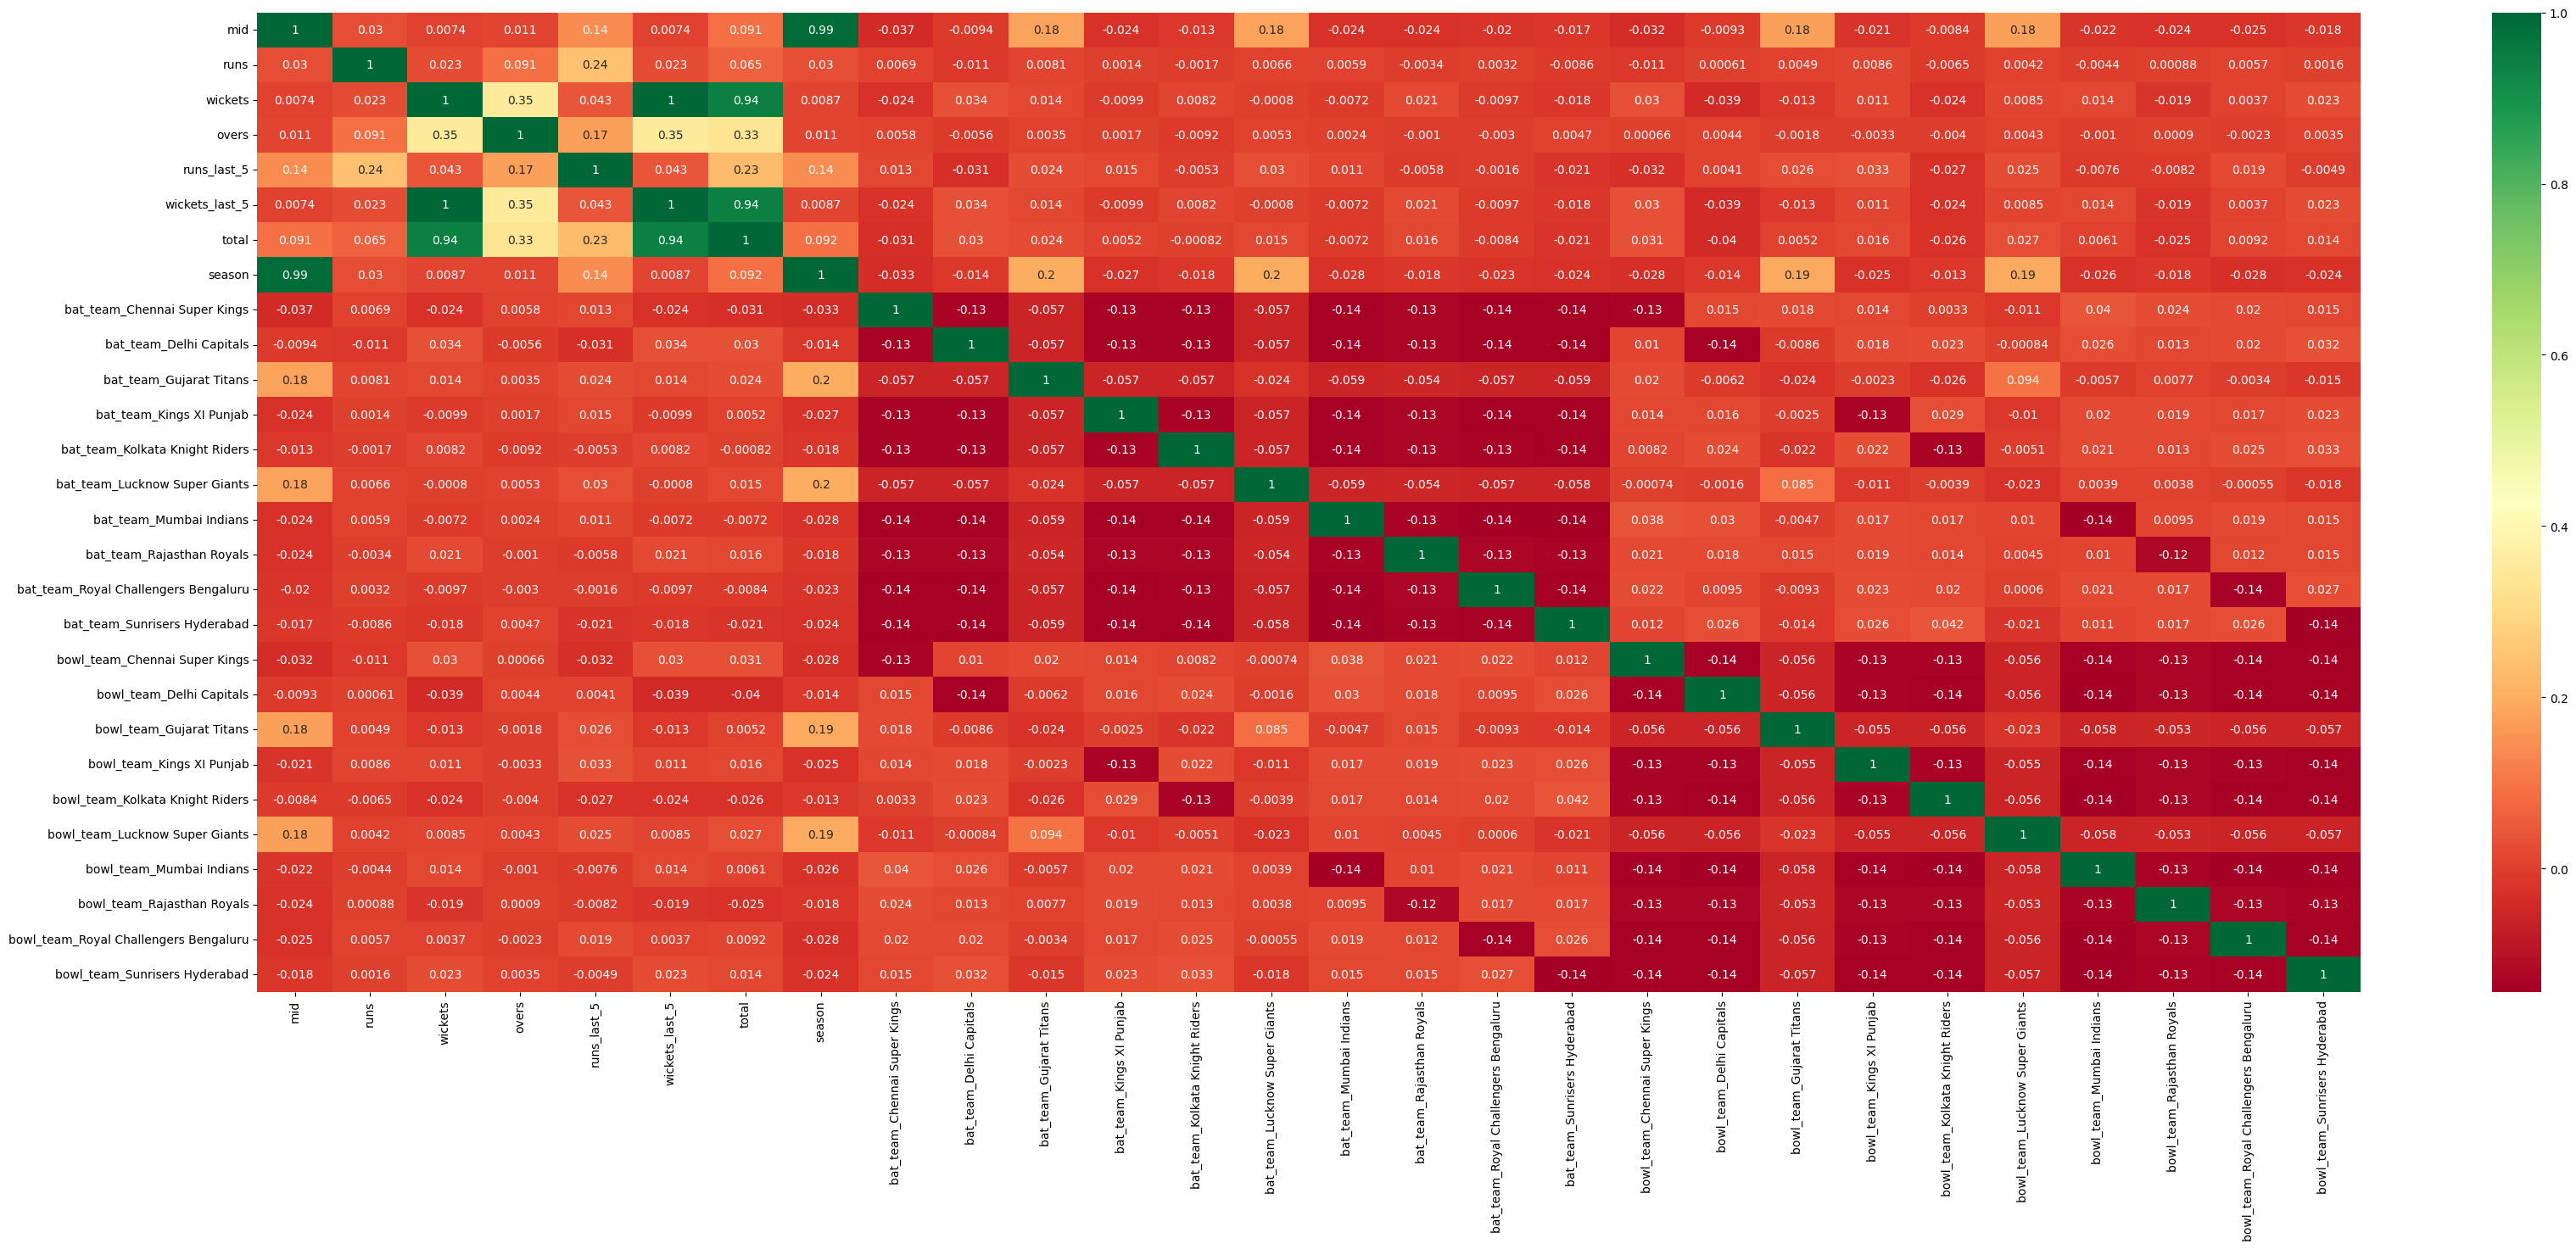

In [45]:
corrmat = df.corr()
plt.figure(figsize=(40, 15))
# plot heat map
sns.heatmap(corrmat, annot=True, cmap="RdYlGn")

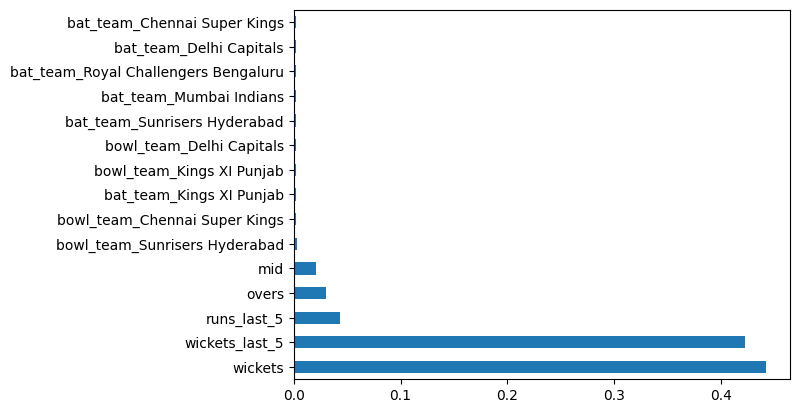

In [46]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X_train, y_train)

# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## MODEL TRAINING


Training Model With Base Parameters


In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
r2_scores = {}
mae = {}

Predictions:
 [ 50.72095665 238.41980531 129.53685346 ... 134.85844557  79.85458122
 204.5641871 ]


r2 score on Training Data 0.9299506275690046
r2 score Test Data is: 0.9306450406039519


MAE:18.45096134284102
MSE:647.690509624351
RMSE:25.449764431608223


C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\1457318900.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='total', ylabel='Density'>

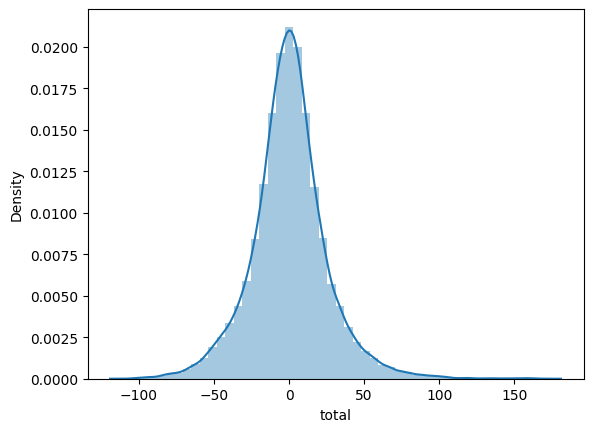

In [49]:
######### LINEAR REGRESSION ###########
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, lr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['Linear Regression'] = r2_score(y_test, predictions)
mae['Linear Regression'] = mean_absolute_error(y_test, predictions)

sns.distplot(y_test-predictions)

Predictions:
 [102.17402883 274.42081681 102.17402883 ... 165.89898066 102.17402883
 274.42081681]


r2 score on Training Data 0.4715887065679889
r2 score Test Data is: 0.4721547249707416


MAE:57.04977888838019
MSE:4929.4293899620825
RMSE:70.20989524249472


C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\1298546596.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='total', ylabel='Density'>

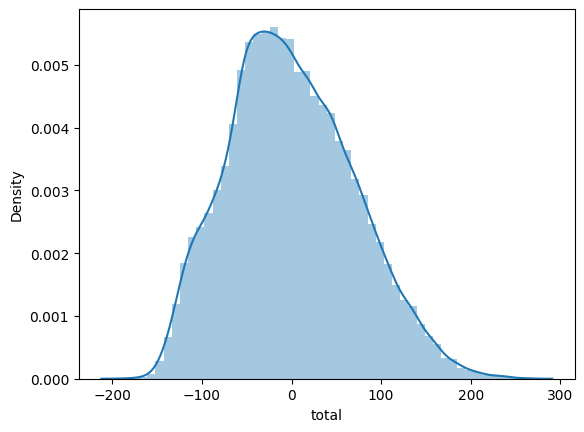

In [50]:
########## DECISION TREES ########
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=5, max_features=3, random_state=42)
dtr.fit(X_train, y_train)

predictions = dtr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, dtr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['DecisionTreeRegressor'] = r2_score(y_test, predictions)
mae['DecisionTreeRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [ 56.36632456 233.98646576 116.97366222 ... 129.15605702  82.39219617
 187.91308357]


r2 score on Training Data 0.9651252203341043
r2 score Test Data is: 0.9563565490355117


MAE:14.652529829433988
MSE:407.5764623483511
RMSE:20.188523035337454


C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\3923397902.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='total', ylabel='Density'>

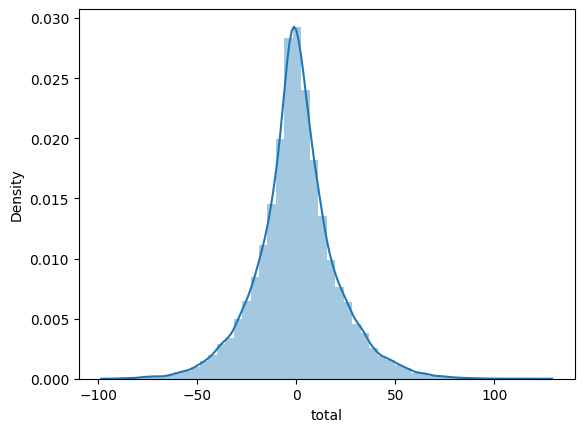

In [52]:
########## RANDOM FOREST  ########
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, max_depth=15,
                           n_estimators=100, max_features='sqrt', min_samples_split=5)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, rf.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['RandomForestRegressor'] = r2_score(y_test, predictions)
mae['RandomForestRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [ 58.64731486 227.87083057 113.55624227 ... 126.33155326  87.17030661
 201.75289607]


r2 score on Training Data 0.9483400003602465
r2 score Test Data is: 0.9439447349380932


MAE:16.66901176422419
MSE:523.4876281557348
RMSE:22.879852013414222


C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\1266129434.py:25: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='total', ylabel='Density'>

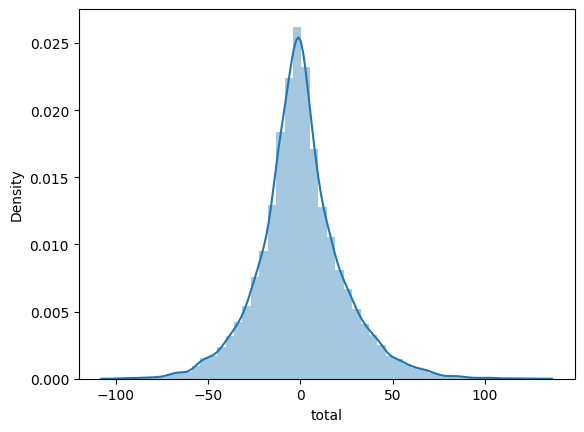

In [54]:
######### EXTRA TREE REGRESSOR ########
from sklearn.ensemble import ExtraTreesRegressor
# max_features='auto' is invalid in current scikit-learn versions — use 'sqrt', 'log2', an int/float, or None.
etr = ExtraTreesRegressor(max_depth=15, n_estimators=100,
                          max_features='sqrt', min_samples_split=5)
etr.fit(X_train, y_train)

predictions = etr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, etr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')

print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['ExtraTreesRegressor'] = r2_score(y_test, predictions)
mae['ExtraTreesRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [ 56.89222197 233.78036041 119.50582983 ... 137.28219886  88.52185091
 197.27563086]


r2 score on Training Data 0.942684189518656
r2 score Test Data is: 0.9425349813833342


MAE:16.595918051391372
MSE:536.6530024314584
RMSE:23.165772217464678


C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\3848263487.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='total', ylabel='Density'>

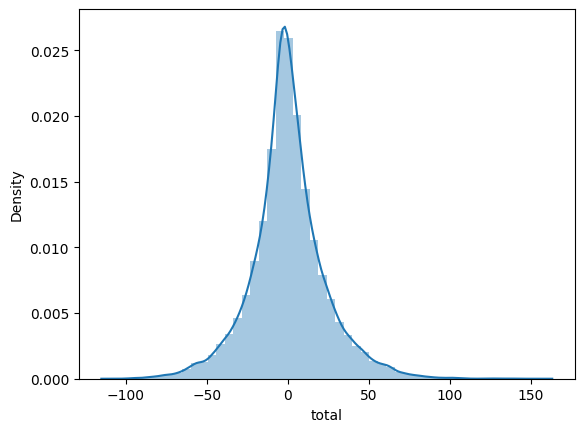

In [55]:
################### GradientBoostingRegressor ###############
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

predictions = gbr.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, gbr.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))


r2_scores['GradientBoostingRegressor'] = r2_score(y_test, predictions)
mae['GradientBoostingRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

Predictions:
 [ 61.482105 222.98512  128.76872  ... 115.014206  87.020134 160.4475  ]


r2 score on Training Data 0.9828612208366394
r2 score Test Data is: 0.9812150597572327


MAE:9.706151962280273
MSE:175.42860412597656
RMSE:13.24494636176291


C:\Users\mks46\AppData\Local\Temp\ipykernel_20300\895780047.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


<Axes: xlabel='total', ylabel='Density'>

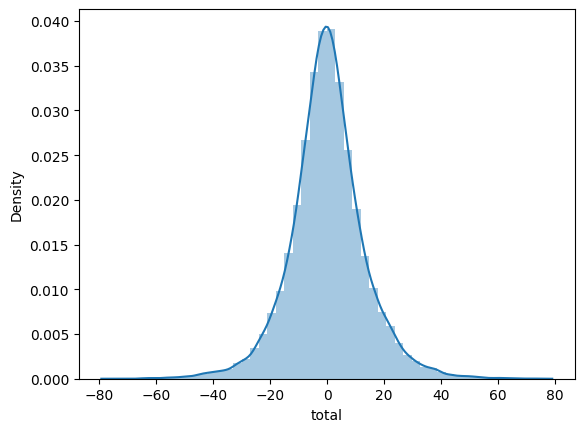

In [58]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)
print("Predictions:\n", predictions)

print('\n')
print('r2 score on Training Data {}'.format(
    r2_score(y_train, xgb.predict(X_train))))
print("r2 score Test Data is: {}".format(r2_score(y_test, predictions)))
print('\n')
print('MAE:{}'.format(mean_absolute_error(y_test, predictions)))
print('MSE:{}'.format(mean_squared_error(y_test, predictions)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, predictions))))

r2_scores['XGBRegressor'] = r2_score(y_test, predictions)
mae['XGBRegressor'] = mean_absolute_error(y_test, predictions)


sns.distplot(y_test-predictions)

[Text(0, 0, '0.981215'),
 Text(0, 0, '0.956357'),
 Text(0, 0, '0.943945'),
 Text(0, 0, '0.942535'),
 Text(0, 0, '0.930645'),
 Text(0, 0, '0.472155')]

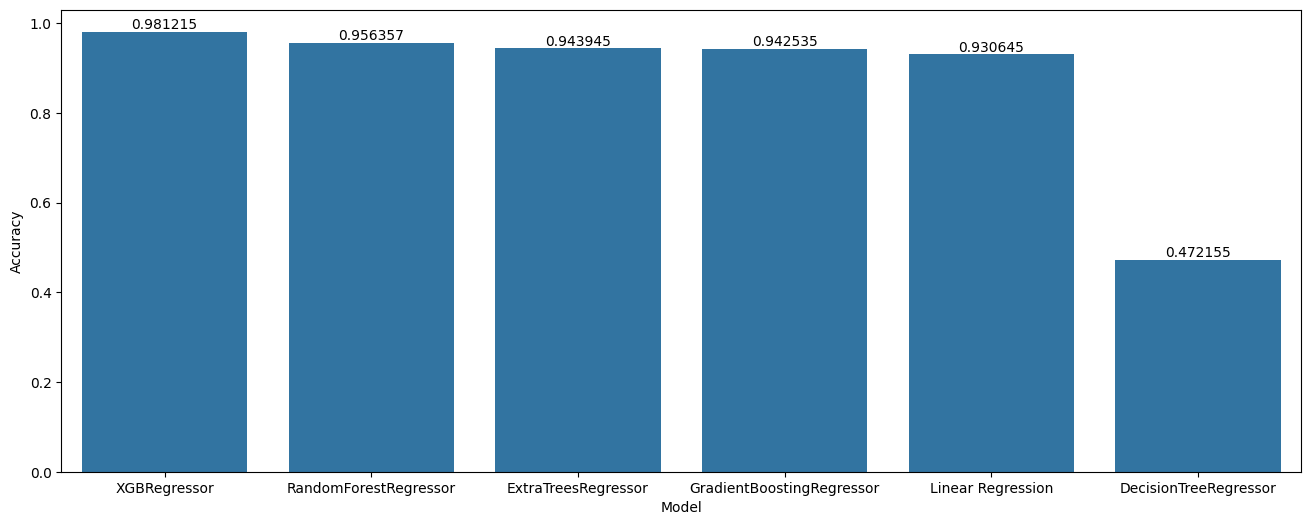

In [59]:
# Comparing Different R2 Scores
plt.figure(figsize=(16, 6))
scores = pd.DataFrame(r2_scores.items(), columns=['Model', 'Accuracy'])
ax = sns.barplot(data=scores.sort_values(
    "Accuracy", ascending=False), x='Model', y='Accuracy')
ax.bar_label(ax.containers[0])

In [ ]:
# Comparing Different MAE
plt.figure(figsize=(16, 6))
scores = pd.DataFrame(mae.items(), columns=['Model', 'MAE'])
ax = sns.barplot(data=scores.sort_values(
    "MAE", ascending=True), x='Model', y='MAE')
ax.bar_label(ax.containers[0])

So Linear Regression Gives Least MAE with Highest Accuracy.


In [ ]:
pd.set_option('display.max_columns', 2000)
X_test.head()

### Predicting On New Situations


In [ ]:
# Actual 147
data = [68, 3, 10.2, 29, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

In [ ]:
# Actual 160
data = [100, 3, 13.1, 42, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

In [ ]:
# Actual 202
data = [180, 2, 18, 70, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
score = etr.predict([data])
print(score)
print(f'Final Score Will Be Between {int(score[0]-5)} and {int(score[0]+5)}')

In [ ]:
import pickle
file_name = 'predict_ipl_1st_innings_score_etr.pkl'
pickle.dump(etr, open(file_name, 'wb'))

In [ ]:
loaded_model = pickle.load(open("predict_ipl_1st_innings_score_etr.pkl", "rb"))
pred = loaded_model.predict(X_test)
print(r2_score(y_test, pred))
print('MAE:{}'.format(mean_absolute_error(y_test, pred)))
print('MSE:{}'.format(mean_squared_error(y_test, pred)))
print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test, pred))))